# Mid-semester assignment Part 2 - Basics of deep learning
---
<br>

### Name and ID:
Student 1: Amos Zohar (ID. 311402812)
<br>
Student 2: Gal Havshush (ID. 207389909)

## Sign Language Digits With Keras
Sign Language Digits dataset contains 5,000 grayscale images in 10 categories. The images show individual articles of hand sign at low resolution (28 by 28 pixels), as seen here:

<table>
  <tr><td>
    <img src="https://www.researchgate.net/publication/344389112/figure/fig8/AS:941467451260937@1601474740275/Sample-images-from-ASL-with-digits-dataset.png"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  
</table>





The images are 28x28 NumPy arrays, with pixel values ranging between 0 and 255. The *labels* are an array of numbers ranging from '0' to '9'. These correspond to the *class* of hand sign digit the image represents:

<table>
  <tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>Hand Sign Zero</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Hand Sign One</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Hand Sign Two</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Hand Sign Three</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Hand Sign Four</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Hand Sign Five</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Hand Sign Six</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Hand Sign Seven</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Hand Sign Eight</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Hand Sign Nine</td>
  </tr>
</table>

<br>


# Neural Network with Tensorflow Keras part 1 (Binary Classification)

## Import Libraries

In [ ]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

## Download Explainer.md file

In [ ]:
!gdown 1j2EypKhgQGTbU5ZENXbc-sPNFQlg7GAW

Downloading...
From: https://drive.google.com/uc?id=1j2EypKhgQGTbU5ZENXbc-sPNFQlg7GAW
To: /content/Explainer.md
100% 2.86k/2.86k [00:00<00:00, 12.9MB/s]


## Download Dataset

In [ ]:
%%capture
!pip install ipython-autotime
!pip install -U --no-cache-dir gdown --pre
!gdown --id 1-0fhqH8tXKPb60C_b4aUHT7f-J4O6Ezq
%load_ext autotime

time: 504 µs (started: 2025-01-12 23:03:38 +00:00)


Loading the dataset as NumPy arrays:

* The `dataset` file is a NumPy array containing the image pixles. As you can see, it includes 5,000 rows for each image and 784 columns for each pixel in the image (28x28).
* The `labels` file is a NumPy array containing the images labels. As you can see, it includes 5,000 rows for each image corresponding to the dataset.

In [ ]:
loaded_data = np.load('/content/dataset_labels.npz')
X, y = loaded_data['dataset'], loaded_data['labels']
print(f'Dataset shape: {X.shape}\nLabels shape: {y.shape}')

Dataset shape: (5000, 784)
Labels shape: (5000,)
time: 56.8 ms (started: 2025-01-12 23:03:56 +00:00)


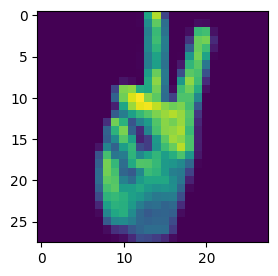

time: 171 ms (started: 2025-01-12 23:03:58 +00:00)


In [ ]:
plt.figure(figsize=(3, 3))
plt.imshow(X[1000].reshape(28,28))
plt.show()

## Data preprocessing


### Feature scaling



In [ ]:
# Normalize the dataset by dividing pixel values by 255.0
X = X/255.0

time: 12.6 ms (started: 2025-01-12 23:04:00 +00:00)


### Select two classes

In [ ]:
selected_classes = ["4","9"]

# Create a boolean mask and applay it to filter only the selected classes from the dataset
mask = np.isin(y, selected_classes)
X_selected = X[mask]
y_selected = y[mask]

# Relable the classes for binary classification (4 --> 0, 9 --> 1)
y_selected = np.where(y_selected == selected_classes[0], 0, 1)

# Split the dataset into training set(80%) and testing set(20%)
X_train, X_test, y_train, y_test = train_test_split(X_selected, y_selected, test_size=0.2, random_state=42, shuffle=True)


# Print shapes for validation
print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (800, 784)
y_train shape: (800,)
X_test shape: (200, 784)
y_test shape: (200,)
time: 16.9 ms (started: 2025-01-12 23:04:02 +00:00)



We need to convert 1-dimensional class arrays to multi-dimensional class matrices<br>


`np_utils.to_categorical` is used to convert array of labeled data(from 0 to nb_classes - 1) to one-hot vector.<br>
Read about np_utils here: https://www.tensorflow.org/api_docs/python/tf/keras/utils/to_categorical

In [ ]:
from keras.utils import to_categorical
num_classes = 2

# Convert y_train and y_test to one-hot encoded matrices
y_train = to_categorical(y_train, num_classes=num_classes)
y_test = to_categorical(y_test, num_classes=num_classes)

# Print shapes for validation
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

y_train shape: (800, 2)
y_test shape: (200, 2)
time: 19 ms (started: 2025-01-12 23:04:04 +00:00)


## The binary classification model

### Build the network layers
Read about Fully connected layers in keras here: https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense

In [ ]:
from keras.models import Sequential
from keras.layers import Input, Dense

model = Sequential([
# Input layer has 784 neurons (28*28 = 784)
Input(shape=(784,)),
# Hidden layer is fully connected with 10 neurons (each neuron uses a sigmoid activation function)
Dense(10, activation='sigmoid'),
# Output layer with 2 neurons for one-hot encoded binary classification, using softmax for probabilities
Dense(2, activation='softmax')
])
# Print the output shape of the model for validation
print(model.output_shape)

(None, 2)
time: 2.93 s (started: 2025-01-12 23:04:07 +00:00)


### Build the Optimizer
Read about the Optimizer here: https://keras.io/api/optimizers/

In [ ]:
from keras.optimizers import Adam
optimizer = Adam(learning_rate=0.01) # Initialize the Adam optimizer with a learning rate of 0.01

time: 10.1 ms (started: 2025-01-12 23:04:14 +00:00)


### Training
Use the fit method to train the model, then store the results within the variable "history".


In [ ]:
%%script echo "Skipping"

# Compile the model with the Adam optimizer
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy', # Use categorical_crossentropy for one-hot labels
              metrics=['accuracy'])

# Train the model on the training data for 10 epochs with a batch size of 32
history = model.fit(X_train, y_train,
                    epochs=10,
                    batch_size = 32)

Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6452 - loss: 0.6286
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9692 - loss: 0.1990  
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9995 - loss: 0.0613 
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0247 
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0153 
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0105 
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0075 
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0064 
Epoch 9/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0049 
Epoch 10/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0042 
time: 2.73 s (started: 2025-01-12 23:04:18 +00:00)


### Loss and Accuracy Visualization
Show  on plot the lose during training

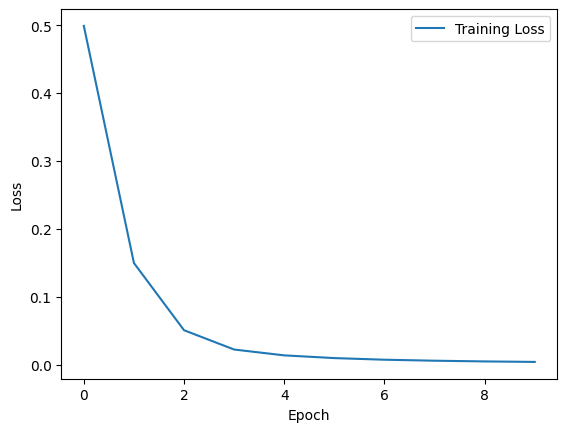

time: 162 ms (started: 2025-01-12 23:04:27 +00:00)


In [ ]:
%%script echo "Skipping"

import matplotlib.pyplot as plt
# Plot the training loss over epochs
plt.plot(history.history['loss'], label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

Show  on plot the accuracy during training

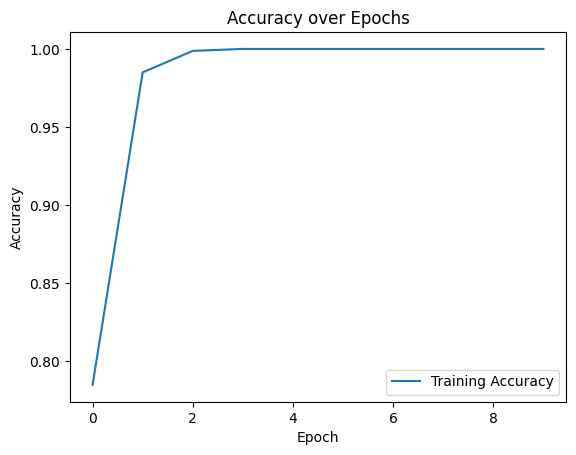

time: 176 ms (started: 2025-01-12 23:04:30 +00:00)


In [ ]:
%%script echo "Skipping"

import matplotlib.pyplot as plt

# Plot training accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


### Test
Test your model (Show accuracy by comparing the prediction VS the test label)

In [ ]:
%%script echo "Skipping"

from sklearn.metrics import accuracy_score
# Predict probabilities for test set
y_pred = model.predict(X_test)
# Convert to class labels
y_pred_classes = np.argmax(y_pred, axis=1)
# Convert one-hot encoded to class labels
y_true = np.argmax(y_test, axis=1)
# Calculate the accuracy of the model on the test set
test_accuracy = accuracy_score(y_true, y_pred_classes)

print("Test Accuracy:", test_accuracy)

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step
Test Accuracy: 1.0
time: 1.35 s (started: 2025-01-12 23:04:37 +00:00)


### Model Evaluation
Show the model evaluation by presenting the confusion metrix in a representative way<br>
Read about confusion metrix visualization here: https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

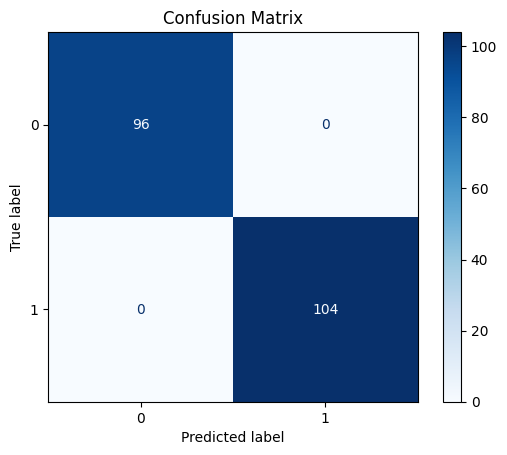

time: 174 ms (started: 2025-01-12 23:04:41 +00:00)


In [ ]:
%%script echo "Skipping"

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
# Convert predicted probabilities to class labels
y_pred_classes = np.argmax(y_pred, axis=1)
# Convert one-hot encoded true labels to class labels
y_true = np.argmax(y_test, axis=1)

# Compute and display the confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


<br>
<br>



---



<br>
<br>

# **Neural Network with Tensorflow Keras part 2 (Multiclass Classification)**

## **Import Libraries**

In [ ]:
%%capture
!pip install ipython-autotime
import tensorflow as tf
from tensorflow import keras
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Input, Flatten, Dense
from keras.optimizers import Adam, SGD
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
import numpy as np
%load_ext autotime

time: 4.64 s (started: 2025-01-12 23:05:04 +00:00)


## **Load Dataset**

In [ ]:
loaded_data = np.load('/content/dataset_labels.npz')
X, y = loaded_data['dataset'], loaded_data['labels']

# Print shape for validation
print(f'Dataset shape: {X.shape}\nLabels shape: {y.shape}')

Dataset shape: (5000, 784)
Labels shape: (5000,)
time: 144 ms (started: 2025-01-12 23:05:12 +00:00)


## **Data preprocessing**

### Normalization

In [ ]:
X = X/255.0

time: 30.2 ms (started: 2025-01-12 23:05:16 +00:00)


### One-hot encoding

In [ ]:
y_as_int = y.astype(int)
num_classes = 10 # 10 classes in the dataset

# Print labels for validation
print("Original training labels: ",np.unique(y_as_int))

y = to_categorical(y_as_int, num_classes=num_classes)

# Print labels for validation
print("One-hot encoded training labels: \n",y)

print("\nShape of y:" ,y.shape)

Original training labels:  [0 1 2 3 4 5 6 7 8 9]
One-hot encoded training labels: 
 [[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]

Shape of y: (5000, 10)
time: 13.7 ms (started: 2025-01-12 23:05:20 +00:00)


### Spliting The Data

In [ ]:
# Split the dataset into training set(80%) and testing set(20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

# Print shapes for validation
print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (4000, 784)
y_train shape: (4000, 10)
X_test shape: (1000, 784)
y_test shape: (1000, 10)
time: 19.1 ms (started: 2025-01-12 23:05:24 +00:00)


<br>

---



## **Models**


### Base Model

#### *Define the base model and compile it*

In [ ]:
base_model = Sequential([
    Input(shape=(784,)),
    Dense(32, activation='sigmoid'),
    Dense(10, activation='softmax')
])

base_model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

time: 27 ms (started: 2025-01-12 23:05:37 +00:00)


#### **(Optional)** *show summary*

In [ ]:
base_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                      │ (None, 32)                  │          25,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 25,450 (99.41 KB)

 Trainable params: 25,450 (99.41 KB)

 Non-trainable params: 0 (0.00 B)

time: 16.3 ms (started: 2025-01-12 23:05:41 +00:00)


#### *Train the base model*

In [ ]:
%%script echo "Skipping"

base_model_history = base_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.2457 - loss: 2.2075 - val_accuracy: 0.4725 - val_loss: 1.9027
Epoch 2/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5801 - loss: 1.7806 - val_accuracy: 0.6637 - val_loss: 1.5503
Epoch 3/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7014 - loss: 1.4734 - val_accuracy: 0.7450 - val_loss: 1.2930
Epoch 4/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7756 - loss: 1.2048 - val_accuracy: 0.8325 - val_loss: 1.0785
Epoch 5/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8379 - loss: 1.0376 - val_accuracy: 0.8550 - val_loss: 0.9144
Epoch 6/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8666 - loss: 0.8776 - val_accuracy: 0.8750 - val_loss: 0.7916
Epoch 7/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8850 - loss: 0.7667 - val_accuracy: 0.9025 - val_loss: 0.6832
Epoch 8/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9072 - loss: 0.6623 - val_accuracy: 0

#### *Plot training and validation loss*

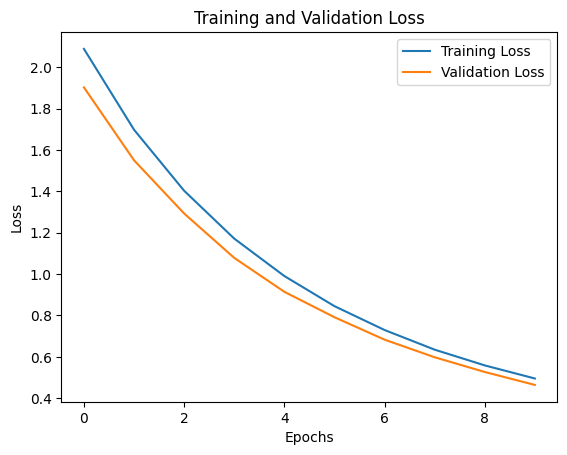

time: 463 ms (started: 2025-01-12 23:05:57 +00:00)


In [ ]:
%%script echo "Skipping"

plt.plot(base_model_history.history['loss'], label='Training Loss')  # Training loss
plt.plot(base_model_history.history['val_loss'], label='Validation Loss')  # Validation loss
plt.xlabel('Epochs')  # Label for x-axis
plt.ylabel('Loss')  # Label for y-axis
plt.title('Training and Validation Loss')  # Title of the plot
plt.legend()  # Add legend to differentiate the lines
plt.show()  # Display the plot

#### *Plot training and validation accuracy*

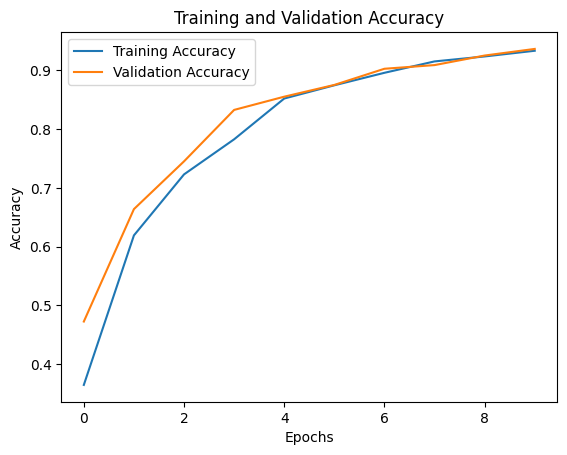

time: 306 ms (started: 2025-01-12 23:08:08 +00:00)


In [ ]:
%%script echo "Skipping"

plt.plot(base_model_history.history['accuracy'], label='Training Accuracy')  # Training accuracy
plt.plot(base_model_history.history['val_accuracy'], label='Validation Accuracy')  # Validation accuracy
plt.xlabel('Epochs')  # Label for x-axis
plt.ylabel('Accuracy')  # Label for y-axis
plt.title('Training and Validation Accuracy')  # Title of the plot
plt.legend()  # Add legend to differentiate the lines
plt.show()  # Display the plot

#### *Test the base model and show the accuracy score, confusion matrix and classification report*

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step
Test Accuracy: 0.922




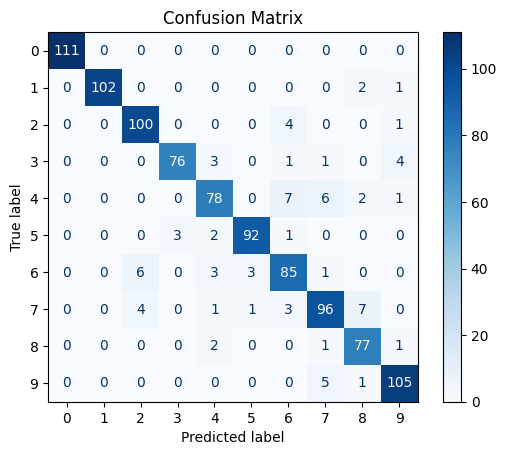



Classification Report:

               precision    recall  f1-score   support

           0       1.00      1.00      1.00       111
           1       1.00      0.97      0.99       105
           2       0.91      0.95      0.93       105
           3       0.96      0.89      0.93        85
           4       0.88      0.83      0.85        94
           5       0.96      0.94      0.95        98
           6       0.84      0.87      0.85        98
           7       0.87      0.86      0.86       112
           8       0.87      0.95      0.91        81
           9       0.93      0.95      0.94       111

    accuracy                           0.92      1000
   macro avg       0.92      0.92      0.92      1000
weighted avg       0.92      0.92      0.92      1000

time: 1.67 s (started: 2025-01-12 23:06:00 +00:00)


In [ ]:
%%script echo "Skipping"

# Predict probabilities for test set
y_pred = base_model.predict(X_test)
# Convert to class labels
y_pred_classes = np.argmax(y_pred, axis=1)
# Convert one-hot encoded to class labels
y_true = np.argmax(y_test, axis=1)
# Calculate the accuracy of the model on the test set
test_accuracy = accuracy_score(y_true, y_pred_classes)

print(f'Test Accuracy: {test_accuracy}\n\n')


# Convert predicted probabilities to class labels
y_pred_classes = np.argmax(y_pred, axis=1)
# Convert one-hot encoded true labels to class labels
y_true = np.argmax(y_test, axis=1)

# Compute and display the confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_true))
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


from sklearn.metrics import classification_report

print("\n\nClassification Report:\n\n",classification_report(y_true, y_pred_classes))




---

### Experiment number 1 - architecture
An additional hidden layer was added to increase the model's capacity to learn more complex patterns from the data, enabling it to better represent intricate relationships. All layers were updated to use the ReLU activation function due to its effectiveness in addressing the vanishing gradient problem, promoting faster convergence during training, and improving overall model performance. All other parameters remain unchanged from the base model to ensure a controlled comparison of performance improvements.

#### *Define experiment 1 model and compile it*

In [ ]:
experiment1_model = Sequential([
    Input(shape=(784,)),
    Dense(128, activation='relu'),
    Dense(32, activation='relu'),
    Dense(10, activation='softmax')
])

experiment1_model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

time: 30.6 ms (started: 2025-01-12 23:09:13 +00:00)


#### **(Optional)** *show summary*

In [ ]:
experiment1_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 32)                  │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 104,938 (409.91 KB)

 Trainable params: 104,938 (409.91 KB)

 Non-trainable params: 0 (0.00 B)

time: 64.7 ms (started: 2025-01-12 23:09:15 +00:00)


#### *Train experiment 1 model*

In [ ]:
%%script echo "Skipping"

experiment1_model_history = experiment1_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.3857 - loss: 1.8626 - val_accuracy: 0.8025 - val_loss: 0.7866
Epoch 2/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8371 - loss: 0.6626 - val_accuracy: 0.9337 - val_loss: 0.3277
Epoch 3/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9393 - loss: 0.3014 - val_accuracy: 0.9712 - val_loss: 0.1872
Epoch 4/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9759 - loss: 0.1621 - val_accuracy: 0.9712 - val_loss: 0.1518
Epoch 5/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9844 - loss: 0.1056 - val_accuracy: 0.9837 - val_loss: 0.0914
Epoch 6/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9950 - loss: 0.0646 - val_accuracy: 0.9825 - val_loss: 0.0824
Epoch 7/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9920 - loss: 0.0562 - val_accuracy: 0.9812 - val_loss: 0.0796
Epoch 8/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9978 - loss: 0.0354 - val_accuracy: 0.

#### *Plot training and validation loss*

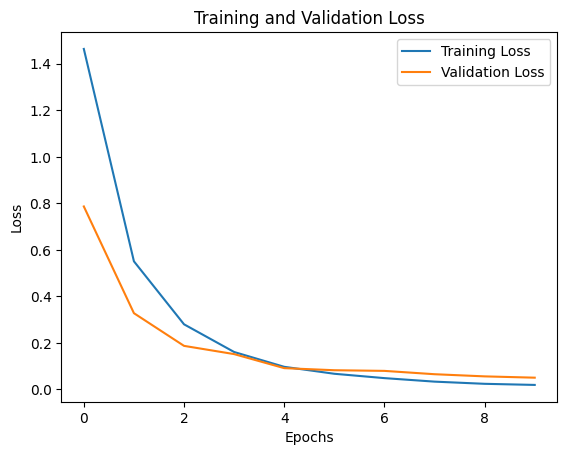

time: 178 ms (started: 2025-01-12 23:09:27 +00:00)


In [ ]:
%%script echo "Skipping"

plt.plot(experiment1_model_history.history['loss'], label='Training Loss')  # Training loss
plt.plot(experiment1_model_history.history['val_loss'], label='Validation Loss')  # Validation loss
plt.xlabel('Epochs')  # Label for x-axis
plt.ylabel('Loss')  # Label for y-axis
plt.title('Training and Validation Loss')  # Title of the plot
plt.legend()  # Add legend to differentiate the lines
plt.show()  # Display the plot

#### *Plot training and validation accuracy*

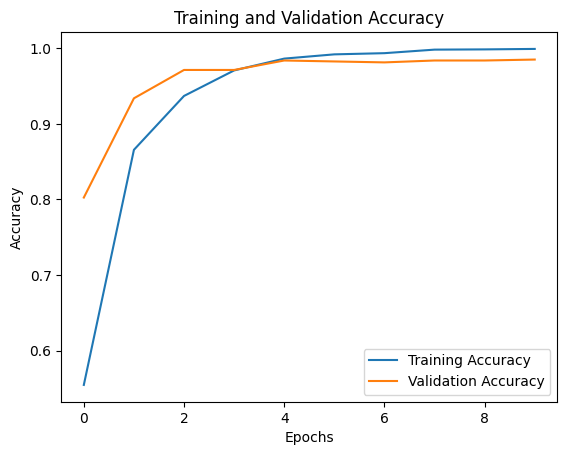

time: 173 ms (started: 2025-01-12 23:10:09 +00:00)


In [ ]:
%%script echo "Skipping"

plt.plot(experiment1_model_history.history['accuracy'], label='Training Accuracy')  # Training accuracy
plt.plot(experiment1_model_history.history['val_accuracy'], label='Validation Accuracy')  # Validation accuracy
plt.xlabel('Epochs')  # Label for x-axis
plt.ylabel('Accuracy')  # Label for y-axis
plt.title('Training and Validation Accuracy')  # Title of the plot
plt.legend()  # Add legend to differentiate the lines
plt.show()  # Display the plot

#### *Test experiment 1 model and show the accuracy score, confusion matrix and classification report*

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Test Accuracy: 0.984




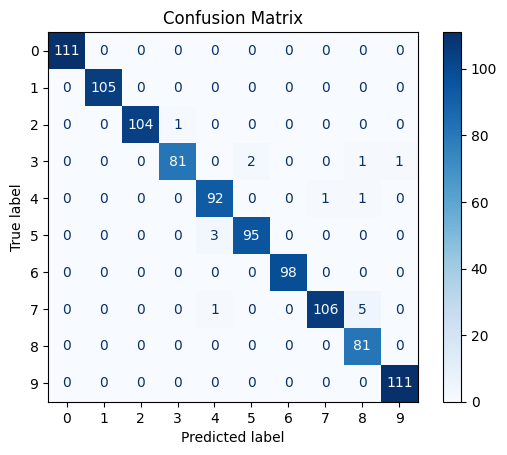



Classification Report:

               precision    recall  f1-score   support

           0       1.00      1.00      1.00       111
           1       1.00      1.00      1.00       105
           2       1.00      0.99      1.00       105
           3       0.99      0.95      0.97        85
           4       0.96      0.98      0.97        94
           5       0.98      0.97      0.97        98
           6       1.00      1.00      1.00        98
           7       0.99      0.95      0.97       112
           8       0.92      1.00      0.96        81
           9       0.99      1.00      1.00       111

    accuracy                           0.98      1000
   macro avg       0.98      0.98      0.98      1000
weighted avg       0.98      0.98      0.98      1000

time: 1.04 s (started: 2025-01-12 23:09:32 +00:00)


In [ ]:
%%script echo "Skipping"

# Predict probabilities for test set
y_pred = experiment1_model.predict(X_test)
# Convert to class labels
y_pred_classes = np.argmax(y_pred, axis=1)
# Convert one-hot encoded to class labels
y_true = np.argmax(y_test, axis=1)
# Calculate the accuracy of the model on the test set
test_accuracy = accuracy_score(y_true, y_pred_classes)

print(f'Test Accuracy: {test_accuracy}\n\n')


# Convert predicted probabilities to class labels
y_pred_classes = np.argmax(y_pred, axis=1)
# Convert one-hot encoded true labels to class labels
y_true = np.argmax(y_test, axis=1)

# Compute and display the confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_true))
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


from sklearn.metrics import classification_report

print("\n\nClassification Report:\n\n",classification_report(y_true, y_pred_classes))




---



### Experiment number 2 - hyper parameters
The batch size was reduced to half of the base model’s batch size, and the number of epochs was doubled. This adjustment aims to strike a balance between more frequent weight updates (due to the smaller batch size) and extended training time (by increasing epochs). The smaller batch size allows the model to learn more granular updates, which can help escape local minima and improve generalization, while the increased epochs ensure the model has sufficient time to converge. The model architecture remains the same as the base model, ensuring that the impact of these hyperparameter changes can be isolated and evaluated.

#### *Define experiment 2 model and compile it*

In [ ]:
experiment2_model = Sequential([
    Input(shape=(784,)),
    Dense(32, activation='relu'),
    Dense(10, activation='softmax')
])

experiment2_model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

time: 35.3 ms (started: 2025-01-12 23:11:10 +00:00)


#### **(Optional)** *show summary*

In [ ]:
experiment2_model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                      │ (None, 32)                  │          25,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 25,450 (99.41 KB)

 Trainable params: 25,450 (99.41 KB)

 Non-trainable params: 0 (0.00 B)

time: 18.8 ms (started: 2025-01-12 23:11:13 +00:00)


#### *Train experiment 2 model*

In [ ]:
%%script echo "Skipping"

experiment2_model_history = experiment2_model.fit(X_train, y_train, epochs=20, batch_size=16, validation_split=0.2)

Epoch 1/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3331 - loss: 1.9424 - val_accuracy: 0.7113 - val_loss: 1.0016
Epoch 2/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7779 - loss: 0.8773 - val_accuracy: 0.8525 - val_loss: 0.5920
Epoch 3/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8942 - loss: 0.5138 - val_accuracy: 0.9162 - val_loss: 0.3944
Epoch 4/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9396 - loss: 0.3507 - val_accuracy: 0.9287 - val_loss: 0.3176
Epoch 5/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9491 - loss: 0.2853 - val_accuracy: 0.9550 - val_loss: 0.2469
Epoch 6/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9651 - loss: 0.2201 - val_accuracy: 0.9513 - val_loss: 0.2142
Epoch 7/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9723 - loss: 0.1675 - val_accuracy: 0.9725 - val_loss: 0.1798
Epoch 8/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9770 - loss: 0.1401 - val_accuracy: 0.

#### *Plot training and validation loss*

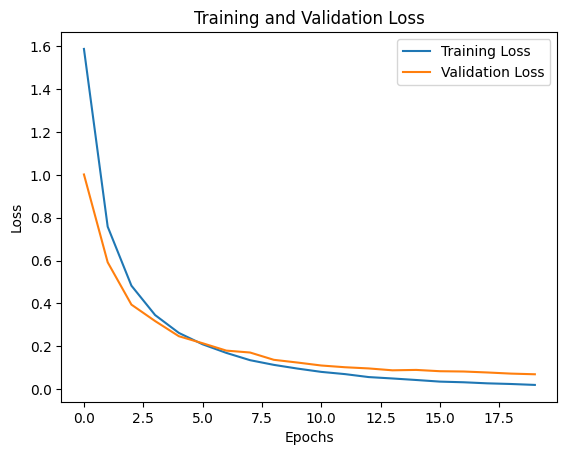

time: 205 ms (started: 2025-01-12 23:11:36 +00:00)


In [ ]:
%%script echo "Skipping"

plt.plot(experiment2_model_history.history['loss'], label='Training Loss')  # Training loss
plt.plot(experiment2_model_history.history['val_loss'], label='Validation Loss')  # Validation loss
plt.xlabel('Epochs')  # Label for x-axis
plt.ylabel('Loss')  # Label for y-axis
plt.title('Training and Validation Loss')  # Title of the plot
plt.legend()  # Add legend to differentiate the lines
plt.show()  # Display the plot

#### *Plot training and validation accuracy*

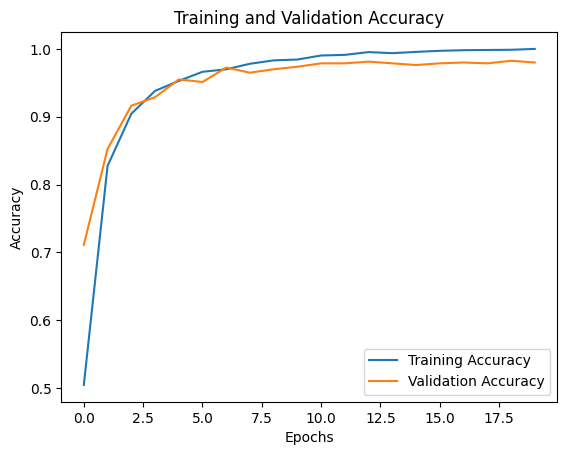

time: 176 ms (started: 2025-01-12 23:12:30 +00:00)


In [ ]:
%%script echo "Skipping"

plt.plot(experiment2_model_history.history['accuracy'], label='Training Accuracy')  # Training accuracy
plt.plot(experiment2_model_history.history['val_accuracy'], label='Validation Accuracy')  # Validation accuracy
plt.xlabel('Epochs')  # Label for x-axis
plt.ylabel('Accuracy')  # Label for y-axis
plt.title('Training and Validation Accuracy')  # Title of the plot
plt.legend()  # Add legend to differentiate the lines
plt.show()  # Display the plot

#### *Test experiment 2 model and show the accuracy score, confusion matrix and classification report*

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Test Accuracy: 0.978




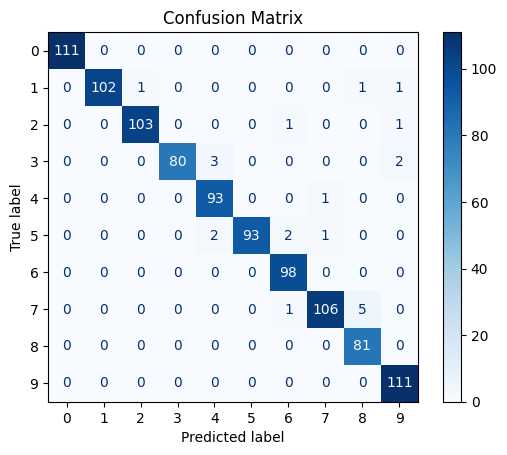



Classification Report:

               precision    recall  f1-score   support

           0       1.00      1.00      1.00       111
           1       1.00      0.97      0.99       105
           2       0.99      0.98      0.99       105
           3       1.00      0.94      0.97        85
           4       0.95      0.99      0.97        94
           5       1.00      0.95      0.97        98
           6       0.96      1.00      0.98        98
           7       0.98      0.95      0.96       112
           8       0.93      1.00      0.96        81
           9       0.97      1.00      0.98       111

    accuracy                           0.98      1000
   macro avg       0.98      0.98      0.98      1000
weighted avg       0.98      0.98      0.98      1000

time: 1.02 s (started: 2025-01-12 23:11:40 +00:00)


In [ ]:
%%script echo "Skipping"

# Predict probabilities for test set
y_pred = experiment2_model.predict(X_test)
# Convert to class labels
y_pred_classes = np.argmax(y_pred, axis=1)
# Convert one-hot encoded to class labels
y_true = np.argmax(y_test, axis=1)
# Calculate the accuracy of the model on the test set
test_accuracy = accuracy_score(y_true, y_pred_classes)

print(f'Test Accuracy: {test_accuracy}\n\n')


# Convert predicted probabilities to class labels
y_pred_classes = np.argmax(y_pred, axis=1)
# Convert one-hot encoded true labels to class labels
y_true = np.argmax(y_test, axis=1)

# Compute and display the confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_true))
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


from sklearn.metrics import classification_report

print("\n\nClassification Report:\n\n",classification_report(y_true, y_pred_classes))



---



### Optimal Model
The optimal model combines the additional hidden layer and ReLU activation from Experiment 1, enhancing its capacity to learn complex patterns, with the hyperparameter adjustments from Experiment 2, including halving the batch size and doubling the epochs. This integration balances increased learning capacity with fine-tuned training dynamics, maximizing the model's performance and generalization.

#### *Define optimal model and compile it*

In [ ]:
optimal_model = Sequential([
    Input(shape=(784,)),
    Dense(128, activation='relu'),
    Dense(32, activation='relu'),
    Dense(10, activation='softmax')
])

optimal_model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

time: 28.2 ms (started: 2025-01-12 23:16:39 +00:00)


#### **(Optional)** *show summary*

In [ ]:
optimal_model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_18 (Dense)                     │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 32)                  │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 104,938 (409.91 KB)

 Trainable params: 104,938 (409.91 KB)

 Non-trainable params: 0 (0.00 B)

time: 16.5 ms (started: 2025-01-12 23:16:41 +00:00)


#### *Train optimal model*

In [ ]:
%%script echo "Skipping"

optimal_model_history = optimal_model.fit(X_train, y_train, epochs=20, batch_size=16, validation_split=0.2)

Epoch 1/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4342 - loss: 1.7078 - val_accuracy: 0.8975 - val_loss: 0.4853
Epoch 2/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9062 - loss: 0.3929 - val_accuracy: 0.9638 - val_loss: 0.2044
Epoch 3/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9662 - loss: 0.1643 - val_accuracy: 0.9625 - val_loss: 0.1606
Epoch 4/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9804 - loss: 0.1093 - val_accuracy: 0.9750 - val_loss: 0.1054
Epoch 5/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9894 - loss: 0.0645 - val_accuracy: 0.9837 - val_loss: 0.0712
Epoch 6/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9938 - loss: 0.0420 - val_accuracy: 0.9862 - val_loss: 0.0634
Epoch 7/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9974 - loss: 0.0272 - val_accuracy: 0.9862 - val_loss: 0.0609
Epoch 8/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9996 - loss: 0.0181 - val_accuracy: 0.

#### *Plot training and validation loss*

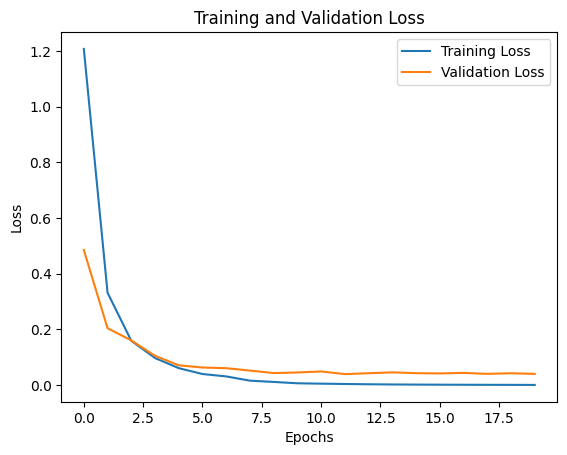

time: 184 ms (started: 2025-01-12 23:17:01 +00:00)


In [ ]:
%%script echo "Skipping"

plt.plot(optimal_model_history.history['loss'], label='Training Loss')  # Training loss
plt.plot(optimal_model_history.history['val_loss'], label='Validation Loss')  # Validation loss
plt.xlabel('Epochs')  # Label for x-axis
plt.ylabel('Loss')  # Label for y-axis
plt.title('Training and Validation Loss')  # Title of the plot
plt.legend()  # Add legend to differentiate the lines
plt.show()  # Display the plot

#### *Plot training and validation accuracy*

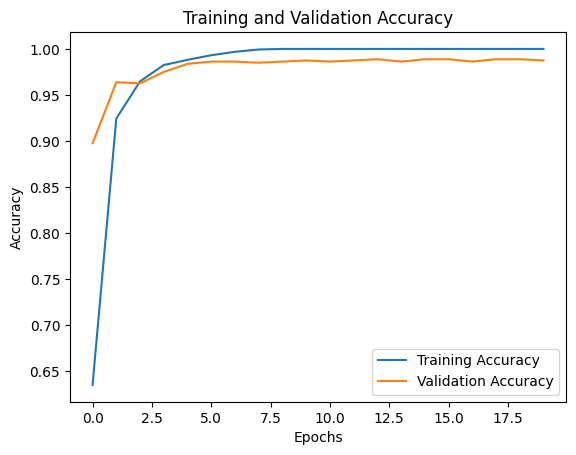

time: 194 ms (started: 2025-01-12 23:17:04 +00:00)


In [ ]:
%%script echo "Skipping"

plt.plot(optimal_model_history.history['accuracy'], label='Training Accuracy')  # Training accuracy
plt.plot(optimal_model_history.history['val_accuracy'], label='Validation Accuracy')  # Validation accuracy
plt.xlabel('Epochs')  # Label for x-axis
plt.ylabel('Accuracy')  # Label for y-axis
plt.title('Training and Validation Accuracy')  # Title of the plot
plt.legend()  # Add legend to differentiate the lines
plt.show()  # Display the plot

#### *Test optimal model and show the accuracy score, confusion matrix and classification report*

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Test Accuracy: 0.991




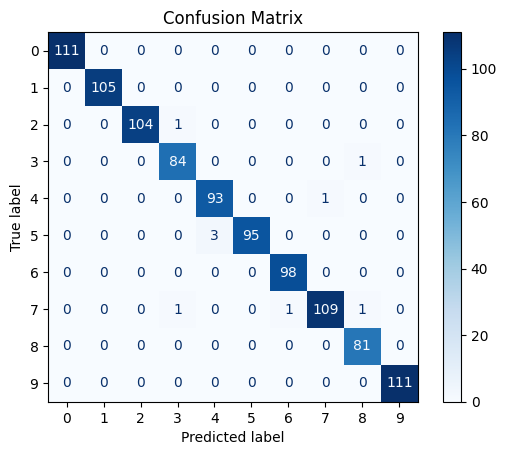



Classification Report:

               precision    recall  f1-score   support

           0       1.00      1.00      1.00       111
           1       1.00      1.00      1.00       105
           2       1.00      0.99      1.00       105
           3       0.98      0.99      0.98        85
           4       0.97      0.99      0.98        94
           5       1.00      0.97      0.98        98
           6       0.99      1.00      0.99        98
           7       0.99      0.97      0.98       112
           8       0.98      1.00      0.99        81
           9       1.00      1.00      1.00       111

    accuracy                           0.99      1000
   macro avg       0.99      0.99      0.99      1000
weighted avg       0.99      0.99      0.99      1000

time: 888 ms (started: 2025-01-12 23:17:07 +00:00)


In [ ]:
%%script echo "Skipping"

# Predict probabilities for test set
y_pred = optimal_model.predict(X_test)
# Convert to class labels
y_pred_classes = np.argmax(y_pred, axis=1)
# Convert one-hot encoded to class labels
y_true = np.argmax(y_test, axis=1)
# Calculate the accuracy of the model on the test set
test_accuracy = accuracy_score(y_true, y_pred_classes)

print(f'Test Accuracy: {test_accuracy}\n\n')


# Convert predicted probabilities to class labels
y_pred_classes = np.argmax(y_pred, axis=1)
# Convert one-hot encoded true labels to class labels
y_true = np.argmax(y_test, axis=1)

# Compute and display the confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_true))
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


from sklearn.metrics import classification_report

print("\n\nClassification Report:\n\n",classification_report(y_true, y_pred_classes))

### **Save Trained Model (The Optimal Model)**
Read about Save and load models in tensorflow.keras here: [https://www.tensorflow.org/tutorials/keras/save_and_load](https://www.tensorflow.org/tutorials/keras/save_and_load)


#### *Save The Model To Google Drive*

In [ ]:
%%script echo "Skipping"

from google.colab import drive
drive.mount('/content/drive')

optimal_model.save('/content/drive/MyDrive/Models/mid2_optimal_model.keras')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
time: 2.34 s (started: 2025-01-12 23:19:06 +00:00)




---



## **Test Environment (of part 2 only)**
This part is meant to show the tester how your model is performing. Keep in mind that the only cells he is going to run are the cells below.<br>
(If there are libraries that need to be used please add their import. If there is a process that the data has to go through before it enters the model, don't forget to add it as well).

### **Import Libraries**

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import load_model

time: 55.7 ms (started: 2025-01-12 23:18:06 +00:00)


### **Load trained model**

In [ ]:
!gdown 1-EjJX2neL1LuCa_9Jf7jegdj3sSROxP0
final_model = load_model('mid2_optimal_model.keras')
final_model.summary()

Downloading...
From: https://drive.google.com/uc?id=1-EjJX2neL1LuCa_9Jf7jegdj3sSROxP0
To: /content/mid2_optimal_model.keras
100% 1.28M/1.28M [00:00<00:00, 113MB/s]


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_18 (Dense)                     │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 32)                  │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 314,816 (1.20 MB)

 Trainable params: 104,938 (409.91 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 209,878 (819.84 KB)

time: 4.34 s (started: 2025-01-12 23:19:17 +00:00)


### **Single prediction**
Let the tester examine your trained model on single predicttion test.<br>You will use the colab.file library to allow the tester to upload a single npy file of an Sign Language Digit (28x28 image as npy).<br>
Then build a function that takes this image, loads the weights of the trained model (If you haven't loaded it before), show the image and prints a prediction.

### Upload a single .npy file with a test example

In [ ]:
from numpy import load as load_npy
from google.colab import files
uploaded = files.upload()

Saving 5_example.npy to 5_example.npy
time: 8.32 s (started: 2025-01-12 23:19:42 +00:00)


### File Preprocessing

The code loads an uploaded .npy file, normalizes its values to [0, 1], and reshapes it from (784,) to (1, 784) for the model prediction.

In [ ]:
file_name = list(uploaded.keys())[0]
example_data = load_npy(file_name)
print(f'Uploaded File Shape: {example_data.shape}')
normalized_data = example_data/255
normalized_data = normalized_data.reshape(1, 784)

Uploaded File Shape: (784,)
time: 2.19 ms (started: 2025-01-12 23:19:53 +00:00)


### Display The Uploaded Image

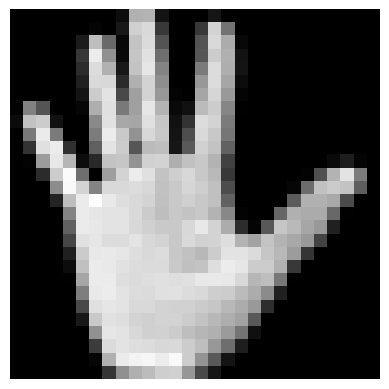

time: 46.2 ms (started: 2025-01-12 23:19:56 +00:00)


In [ ]:
image = example_data.reshape(28,28)
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.show()

### Print Predicted Class

In [ ]:
print(normalized_data.shape)
prediction = final_model.predict(normalized_data)
predicted_class = np.argmax(prediction, axis=1)
print(f"Predicted class: {predicted_class[0]}")

(1, 784)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step
Predicted class: 5
time: 257 ms (started: 2025-01-12 23:20:10 +00:00)
